In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Training data
app_train = pd.read_csv('F:/Project/application_train.csv')
print('Training data shape: ', app_train.shape)
#app_train.head()

# Testing data features
app_test = pd.read_csv('F:/Project/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Training data shape:  (307511, 122)
Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
train_labels = app_train['TARGET']
train_sk_id_curr = app_train['SK_ID_CURR']
test_sk_id_curr = app_test['SK_ID_CURR']

app_train.drop('SK_ID_CURR', inplace=True, axis=1)
app_test.drop('SK_ID_CURR', inplace=True, axis=1)

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 120)
Testing Features shape:  (48744, 120)


In [12]:
cat_features = [f for f in app_train.columns if app_train[f].dtype == 'object']

In [13]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols, query_cols, sorter=sidx)]

In [14]:
cat_features_inds = column_index(app_train, cat_features)    
print("Cat features are: %s" % [f for f in cat_features])
print(cat_features_inds)

Cat features are: ['CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
[ 1  9 10 11 12 13 26 30 38 84 85 87 88]


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_features:
    app_train[col] = le.fit_transform(app_train[col].astype(str))
    app_test[col] = le.fit_transform(app_test[col].astype(str))

In [19]:
app_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(app_train)
app_train = imputer.transform(app_train)
app_test = imputer.transform(app_test)

In [58]:
############PCA###############################

from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(app_train)

In [59]:
print(np.sort(pca.explained_variance_,axis=-1, kind='quicksort', order=None))

[3.25005231e-06 4.52927267e-06 5.59291321e-06 6.11603280e-06
 6.49933034e-06 7.14613094e-06 8.34982242e-06 9.90206365e-06
 1.24816504e-05 1.33372026e-05 1.45788497e-05 1.68806464e-05
 1.74583964e-05 1.86464078e-05 2.08157983e-05 2.27511709e-05
 3.01719018e-05 3.44507733e-05 3.86968754e-05 4.21469018e-05
 4.40717781e-05 4.95590514e-05 5.31824017e-05 5.66843985e-05
 6.30560088e-05 6.68994766e-05 7.00131814e-05 7.30810682e-05
 8.09471891e-05 8.24216083e-05 8.40615588e-05 9.45074373e-05
 1.23060628e-04 1.75896462e-04 1.91448612e-04 2.65763786e-04
 3.33058145e-04 4.93369534e-04 5.56709095e-04 5.97203538e-04
 8.78230716e-04 1.19872675e-03 1.56410963e-03 1.61044310e-03
 1.91788151e-03 2.13251992e-03 2.17360662e-03 2.34890882e-03
 2.92002047e-03 3.13289283e-03 3.44019420e-03 3.68130380e-03
 3.80994725e-03 4.44359752e-03 5.00898116e-03 5.35223948e-03
 5.51244516e-03 5.93075456e-03 6.08844039e-03 6.75134397e-03
 7.88307959e-03 8.57809894e-03 9.62172952e-03 9.86672163e-03
 1.06434396e-02 1.091955

In [60]:
print(np.sort(pca.explained_variance_ratio_)) 


[8.67134105e-18 1.20843803e-17 1.49222392e-17 1.63179547e-17
 1.73406163e-17 1.90663204e-17 2.22778438e-17 2.64193197e-17
 3.33018170e-17 3.55844834e-17 3.88972748e-17 4.50386111e-17
 4.65800839e-17 4.97497719e-17 5.55378403e-17 6.07015343e-17
 8.05005045e-17 9.19167989e-17 1.03245663e-16 1.12450547e-16
 1.17586236e-16 1.32226621e-16 1.41893945e-16 1.51237489e-16
 1.68237341e-16 1.78491951e-16 1.86799508e-16 1.94984820e-16
 2.15972119e-16 2.19905961e-16 2.24281450e-16 2.52151701e-16
 3.28333385e-16 4.69302664e-16 5.10796767e-16 7.09074257e-16
 8.88619779e-16 1.31634050e-15 1.48533438e-15 1.59337606e-15
 2.34317399e-15 3.19827728e-15 4.17314145e-15 4.29676202e-15
 5.11702677e-15 5.68969535e-15 5.79931720e-15 6.26703435e-15
 7.79079564e-15 8.35875229e-15 9.17865139e-15 9.82194676e-15
 1.01651755e-14 1.18557937e-14 1.33642722e-14 1.42801067e-14
 1.47075454e-14 1.58236208e-14 1.62443364e-14 1.80130042e-14
 2.10325451e-14 2.28868997e-14 2.56713708e-14 2.63250250e-14
 2.83973567e-14 2.913405

In [53]:
print(np.sort(pca.explained_variance_ratio_ * 100)) 


[8.67134105e-16 1.20843803e-15 1.49222392e-15 1.63179547e-15
 1.73406163e-15 1.90663204e-15 2.22778438e-15 2.64193197e-15
 3.33018170e-15 3.55844834e-15 3.88972748e-15 4.50386111e-15
 4.65800839e-15 4.97497719e-15 5.55378403e-15 6.07015343e-15
 8.05005045e-15 9.19167989e-15 1.03245663e-14 1.12450547e-14
 1.17586236e-14 1.32226621e-14 1.41893945e-14 1.51237489e-14
 1.68237341e-14 1.78491951e-14 1.86799508e-14 1.94984820e-14
 2.15972119e-14 2.19905961e-14 2.24281450e-14 2.52151701e-14
 3.28333385e-14 4.69302664e-14 5.10796767e-14 7.09074257e-14
 8.88619779e-14 1.31634050e-13 1.48533438e-13 1.59337606e-13
 2.34317399e-13 3.19827728e-13 4.17314145e-13 4.29676202e-13
 5.11702677e-13 5.68969535e-13 5.79931720e-13 6.26703435e-13
 7.79079564e-13 8.35875229e-13 9.17865139e-13 9.82194676e-13
 1.01651755e-12 1.18557937e-12 1.33642722e-12 1.42801067e-12
 1.47075454e-12 1.58236208e-12 1.62443364e-12 1.80130042e-12
 2.10325451e-12 2.28868997e-12 2.56713708e-12 2.63250250e-12
 2.83973567e-12 2.913405

In [61]:
print(np.sort(pca.singular_values_))  

[9.99711751e-01 1.18016806e+00 1.31144071e+00 1.37140120e+00
 1.41372171e+00 1.48239898e+00 1.60239006e+00 1.74498814e+00
 1.95914071e+00 2.02517238e+00 2.11734316e+00 2.27836950e+00
 2.31703075e+00 2.39456820e+00 2.53003283e+00 2.64503545e+00
 3.04600747e+00 3.25483599e+00 3.44959072e+00 3.60008247e+00
 3.68137372e+00 3.90383195e+00 4.04402279e+00 4.17504723e+00
 4.40344788e+00 4.53566512e+00 4.64001653e+00 4.74058639e+00
 4.98919534e+00 5.03442835e+00 5.08426690e+00 5.39091662e+00
 6.15161554e+00 7.35458503e+00 7.67283278e+00 9.04018926e+00
 1.01202130e+01 1.23173076e+01 1.30840977e+01 1.35516073e+01
 1.64336462e+01 1.91994912e+01 2.19312415e+01 2.22537043e+01
 2.42851342e+01 2.56080300e+01 2.58535446e+01 2.68758805e+01
 2.99655718e+01 3.10386191e+01 3.25252843e+01 3.36457684e+01
 3.42285974e+01 3.69655336e+01 3.92468062e+01 4.05692884e+01
 4.11719809e+01 4.27055773e+01 4.32695771e+01 4.55643038e+01
 4.92354121e+01 5.13600156e+01 5.43946509e+01 5.50828065e+01
 5.72098253e+01 5.794715

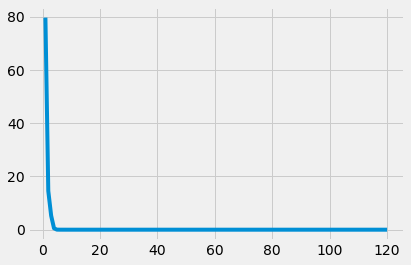

In [62]:
y = pca.explained_variance_ratio_ * 100
x = np.arange(1,121)
plt.plot(x,y)
plt.show()

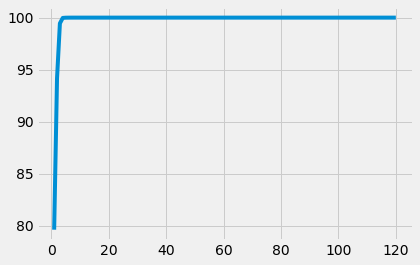

In [63]:
# Set the style of plots
plt.style.use('fivethirtyeight')
y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,121)
plt.plot(x,y)
plt.show()

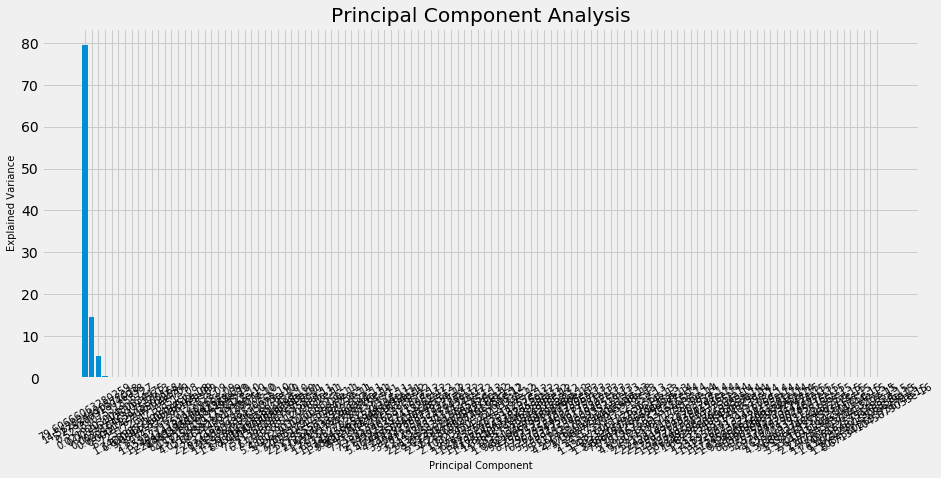

In [39]:
index = np.arange(len(pca.explained_variance_ratio_))
plt.figure(figsize=(14,6))
plt.title('Principal Component Analysis')
plt.bar(index, pca.explained_variance_ratio_*100)
plt.xlabel('Principal Component', fontsize=10)
plt.ylabel('Explained Variance', fontsize=10)
plt.xticks(index, pca.explained_variance_ratio_*100, fontsize=10, rotation=30)
plt.show()